follows [this blog post](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
data_directory = "neural-networks-and-deep-learning/data/"

"neural-networks-and-deep-learning/data/"

In [3]:
training_data = readcsv(join([data_directory, "training.csv"]))';

In [4]:
training_answers = readcsv(join([data_directory, "training_answers.csv"]))[:];

In [5]:
validation_data = readcsv(join([data_directory, "validation.csv"]))';

In [6]:
validation_answers = readcsv(join([data_directory, "validation_answers.csv"]));

In [116]:
function mnist_show( image )
    imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
end

mnist_show (generic function with 1 method)

Label: 1

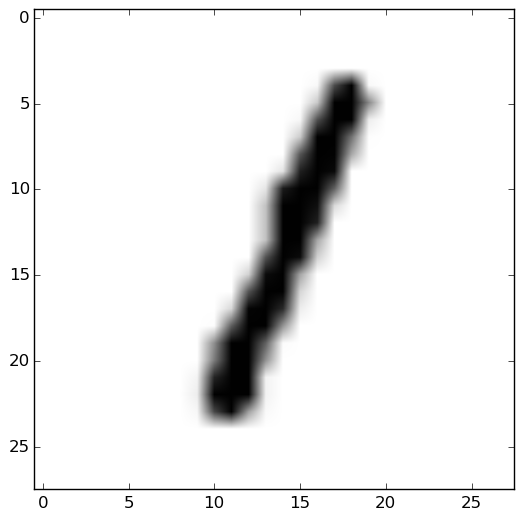

In [9]:
i = rand(1:50000)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
@printf("Label: %i", training_answers[i])

In [39]:
function feedforward(weights, biases, activations, f)
    for i = 1:length(weights)-1
        activations = f(weights[i] * activations + biases[i])
    end
    return softmax(weights[end] * activations + biases[end])
end

feedforward (generic function with 1 method)

In [12]:
function sigmoid(x)
    return 1.0 ./ (1.0 + exp(-x))
end

sigmoid (generic function with 1 method)

In [29]:
function softmax(x :: Array{Float64,1})
    a = exp(x)
    return a ./ sum(a)
end

softmax (generic function with 1 method)

In [14]:
function d_sigmoid(x)
    a = exp(-x)
    return a ./ ( 1 + a).^2
end

d_sigmoid (generic function with 1 method)

In [15]:
n_input = 28 * 28
n_hidden = 30
n_output = 10
weights = {randn(n_hidden, n_input), randn(n_output, n_nidden)}
biases = {randn(n_hidden), randn(n_output)}

2-element Array{Any,1}:
 [0.807183,0.429188,0.651976,1.02587,-0.535464,0.501295,-0.60924,-1.97168,0.622192,1.31319  …  -2.2191,-0.304558,-1.11295,0.745449,1.78667,0.284827,1.89845,1.20861,1.30499,-0.641277]
 [-0.640765,-1.11325,0.152054,0.0142478,0.909836,0.0547737,-0.167473,0.490425,-0.97359,-1.51644]                                                                                      

In [33]:
function backprop(weights, biases, input, answer, f, df, s)
    n = length(weights)
    
    function propagator(input, i)
        weighted_sum = weights[i] * input + biases[i]
        
        if i == n
            backpropagator = softmax(weighted_sum)
            backpropagator[answer] -= 1
        else
            layer_output = f(weighted_sum)
            d_layer_output = df(weighted_sum)
        
            backpropagator = propagator(layer_output, i+1) .* d_layer_output
        end
        biases[i] -= s * backpropagator
        weights[i] -= s * backpropagator * input'
        return weights[i]' * backpropagator
    end
    propagator(input, 1)
end

backprop (generic function with 1 method)

In [34]:
training_inted = convert(Array{Int32,1}, training_answers);

In [80]:
for j = 1:10
    for i = 1:50000
        backprop(weights, biases, training_data[:,i], training_inted[i]+1, sigmoid, d_sigmoid, 0.01);
    end
    
    n = length(validation_answers)
    accuracy = 0
    for i = 1:n
        if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
            accuracy += 1
        end
    end
    @printf("Epoch %d: %f\n", j, accuracy/n)
end

Epoch 1: 0.951200
Epoch 2: 0.952300
Epoch 3: 0.951800
Epoch 4: 0.952300
Epoch 5: 0.952700
Epoch 6: 0.952600
Epoch 7: 0.953400
Epoch 8: 0.953100
Epoch 9: 0.953400
Epoch 10: 0.953400


Image number: 23249
Image Label: 7
Network Guess: 7

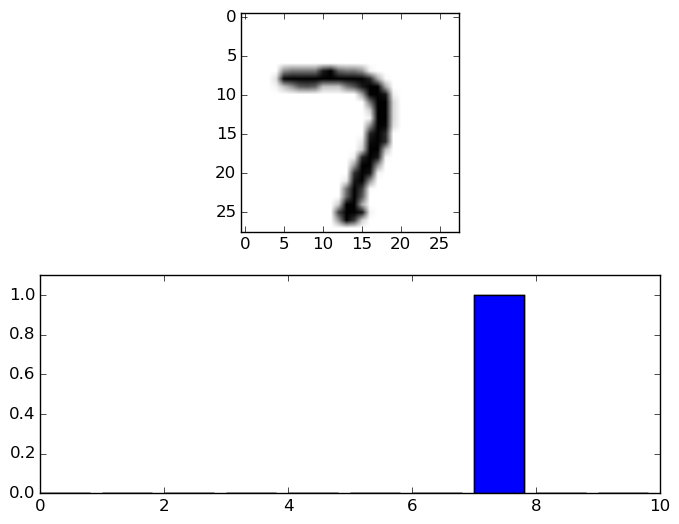

In [123]:
i = rand(1:50000)
network_guess = indmax(feedforward(weights,biases, training_data[:,i], sigmoid))-1
@printf("Image number: %d\nImage Label: %d\nNetwork Guess: %d", i, training_answers[i], network_guess)
subplot(211)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
subplot(212)
axis([0.0,10.0,0.0,1.1])
bar([0:9],[ (training_answers[i] == j ? 1.0 : 0.0) for j in 0:9 ], color="red")
bar([0:9],feedforward(weights,biases, training_data[:,i], sigmoid));

In [101]:
n = length(validation_answers)
accuracy = 0
for i = 1:n
    if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
        accuracy += 1
    end
end
@printf("Network Accuracy: %f", accuracy/n)

Network Accuracy: 0.953400

In [114]:
wrong_indices = zeros(Bool, length(validation_answers))
for i = 1:length(validation_answers)
    wrong_indices[i] = indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 != validation_answers[i]
end

In [115]:
wrong = validation_data[:, wrong_indices]

784x466 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

Image number: 30
Network Guess: 3


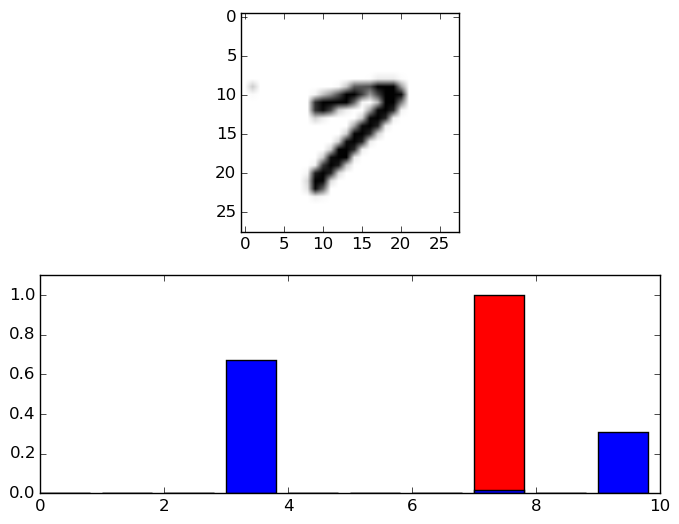

In [129]:
i = rand(1:466)
network_guess = indmax(feedforward(weights,biases, wrong[:,i], sigmoid))-1
@printf("Image number: %d\nNetwork Guess: %d\n", i, network_guess)
subplot(211)
mnist_show(wrong[:,i])
subplot(212)
axis([0.0,10.0,0.0,1.1])
bar([0:9],[ (training_answers[i] == j ? 1.0 : 0.0) for j in 0:9 ], color="red")
bar([0:9],feedforward(weights,biases, wrong[:,i], sigmoid));